In [190]:
import spacy
from collections import Counter
from nltk.tokenize import word_tokenize


In [191]:
nlp=spacy.load('en_core_web_sm')

In [192]:
docs=[
    'Pancreatic cancer with metastasis. Jaundice with transaminitis, evaluate for obstruction process.',
    'Pancreatitis. Breast cancer. No output from enteric tube. Assess tube.',
    'Metastasis pancreatic cancer. Acute renal failure, evaluate for hydronephrosis or obstructive uropathy.'
]
aux=[]
aux=(text.lower() for text in docs)
docs=aux
    
processed_docs=[]
print("Documentos originales")
for doc in docs:
    processed_docs.append(nlp(doc))
    print(processed_docs[-1])
    
stopless_list=[]
print("Tokenizado")
for doc in processed_docs:
    tokens_stopless=[token for token in doc if not token.is_stop]#Quitamos las stopwords y almacenamos cada resultante
    stopless_list.append(tokens_stopless)
    
for doc in stopless_list:
    print(doc)


Documentos originales
pancreatic cancer with metastasis. jaundice with transaminitis, evaluate for obstruction process.
pancreatitis. breast cancer. no output from enteric tube. assess tube.
metastasis pancreatic cancer. acute renal failure, evaluate for hydronephrosis or obstructive uropathy.
Tokenizado
[pancreatic, cancer, metastasis, ., jaundice, transaminitis, ,, evaluate, obstruction, process, .]
[pancreatitis, ., breast, cancer, ., output, enteric, tube, ., assess, tube, .]
[metastasis, pancreatic, cancer, ., acute, renal, failure, ,, evaluate, hydronephrosis, obstructive, uropathy, .]


In [193]:
#Postagging y stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
docs=[]
for doc in stopless_list:    
        pos_test=[(token.lemma_,token.pos_) for token in doc]
        stem_ntlk=[(stemmer.stem(token[0]),token[1]) for token in pos_test]
        docs.append(stem_ntlk)
        print(docs[-1])

[('pancreat', 'ADJ'), ('cancer', 'NOUN'), ('metastasi', 'NOUN'), ('.', 'PUNCT'), ('jaundic', 'NOUN'), ('transamin', 'NOUN'), (',', 'PUNCT'), ('evalu', 'VERB'), ('obstruct', 'NOUN'), ('process', 'NOUN'), ('.', 'PUNCT')]
[('pancreat', 'PROPN'), ('.', 'PUNCT'), ('breast', 'NOUN'), ('cancer', 'NOUN'), ('.', 'PUNCT'), ('output', 'NOUN'), ('enter', 'ADJ'), ('tube', 'NOUN'), ('.', 'PUNCT'), ('assess', 'NOUN'), ('tube', 'NOUN'), ('.', 'PUNCT')]
[('metastasi', 'NOUN'), ('pancreat', 'ADJ'), ('cancer', 'NOUN'), ('.', 'PUNCT'), ('acut', 'PROPN'), ('renal', 'ADJ'), ('failur', 'NOUN'), (',', 'PUNCT'), ('evalu', 'VERB'), ('hydronephrosi', 'NOUN'), ('obstruct', 'ADJ'), ('uropathi', 'NOUN'), ('.', 'PUNCT')]


In [194]:
#Remocion de puntuaciones
clean_docs=[]
for doc in docs:
    clean_text=[(token[0],token[1])for token in doc if token[1] != 'PUNCT']
    clean_docs.append(clean_text)
    print(clean_text)

[('pancreat', 'ADJ'), ('cancer', 'NOUN'), ('metastasi', 'NOUN'), ('jaundic', 'NOUN'), ('transamin', 'NOUN'), ('evalu', 'VERB'), ('obstruct', 'NOUN'), ('process', 'NOUN')]
[('pancreat', 'PROPN'), ('breast', 'NOUN'), ('cancer', 'NOUN'), ('output', 'NOUN'), ('enter', 'ADJ'), ('tube', 'NOUN'), ('assess', 'NOUN'), ('tube', 'NOUN')]
[('metastasi', 'NOUN'), ('pancreat', 'ADJ'), ('cancer', 'NOUN'), ('acut', 'PROPN'), ('renal', 'ADJ'), ('failur', 'NOUN'), ('evalu', 'VERB'), ('hydronephrosi', 'NOUN'), ('obstruct', 'ADJ'), ('uropathi', 'NOUN')]


In [195]:
#Tokens unicos
from collections import Counter
import matplotlib.pyplot as plt
tokens=[]
for doc in clean_docs:
    for token in doc:#Juntamos todos los tokens en una lista
        tokens.append(token)

tokens_freq=Counter(elem[0] for elem in tokens)
unique_tokens=[token for token,freq in tokens_freq.items() if freq==1]
print("Numero de tokens unicos "+str(len(unique_tokens)))
print(unique_tokens)

Numero de tokens unicos 12
['jaundic', 'transamin', 'process', 'breast', 'output', 'enter', 'assess', 'acut', 'renal', 'failur', 'hydronephrosi', 'uropathi']


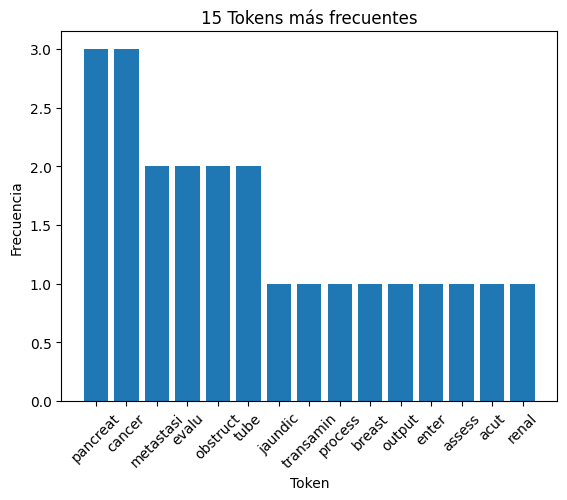

In [196]:
#Tokens mas frecuentes
ordered_tokens=tokens_freq.most_common(15)
tokens_graph=[token[0] for token in ordered_tokens]
token_freq=[token[1] for token in ordered_tokens]
plt.bar(tokens_graph,token_freq)
plt.title('15 Tokens más frecuentes')
plt.xlabel('Token')
plt.ylabel('Frecuencia')

plt.xticks(rotation=45)
plt.show()

In [197]:
#One hot encoding
total_terms=0
for i in tokens_freq:
    total_terms+=1
print(total_terms)
print(tokens_freq)

pt=[[token,(freq/total_terms)]for token,freq in tokens_freq.items()]
print(pt)

18
Counter({'pancreat': 3, 'cancer': 3, 'metastasi': 2, 'evalu': 2, 'obstruct': 2, 'tube': 2, 'jaundic': 1, 'transamin': 1, 'process': 1, 'breast': 1, 'output': 1, 'enter': 1, 'assess': 1, 'acut': 1, 'renal': 1, 'failur': 1, 'hydronephrosi': 1, 'uropathi': 1})
[['pancreat', 0.16666666666666666], ['cancer', 0.16666666666666666], ['metastasi', 0.1111111111111111], ['jaundic', 0.05555555555555555], ['transamin', 0.05555555555555555], ['evalu', 0.1111111111111111], ['obstruct', 0.1111111111111111], ['process', 0.05555555555555555], ['breast', 0.05555555555555555], ['output', 0.05555555555555555], ['enter', 0.05555555555555555], ['tube', 0.1111111111111111], ['assess', 0.05555555555555555], ['acut', 0.05555555555555555], ['renal', 0.05555555555555555], ['failur', 0.05555555555555555], ['hydronephrosi', 0.05555555555555555], ['uropathi', 0.05555555555555555]]


In [198]:
#TF
Tfs=[]#Conjunto de tf's
for doc in clean_docs:#ITERAMOS EN LOS DOCUMENTOS PARA OBTENER EL TF DE CADA UNO
    aux=[]
    tokens_freq=Counter(token[0] for token in doc)#Contamos los terminos de cada documento
    for tokens in pt:
        #print(tokens_freq[tokens[0]])
        tokens.append(tokens_freq[tokens[0]]/sum(tokens_freq.values()))
            
for token in pt:
    print(token)    
            
        
    
    
    

['pancreat', 0.16666666666666666, 0.125, 0.125, 0.1]
['cancer', 0.16666666666666666, 0.125, 0.125, 0.1]
['metastasi', 0.1111111111111111, 0.125, 0.0, 0.1]
['jaundic', 0.05555555555555555, 0.125, 0.0, 0.0]
['transamin', 0.05555555555555555, 0.125, 0.0, 0.0]
['evalu', 0.1111111111111111, 0.125, 0.0, 0.1]
['obstruct', 0.1111111111111111, 0.125, 0.0, 0.1]
['process', 0.05555555555555555, 0.125, 0.0, 0.0]
['breast', 0.05555555555555555, 0.0, 0.125, 0.0]
['output', 0.05555555555555555, 0.0, 0.125, 0.0]
['enter', 0.05555555555555555, 0.0, 0.125, 0.0]
['tube', 0.1111111111111111, 0.0, 0.25, 0.0]
['assess', 0.05555555555555555, 0.0, 0.125, 0.0]
['acut', 0.05555555555555555, 0.0, 0.0, 0.1]
['renal', 0.05555555555555555, 0.0, 0.0, 0.1]
['failur', 0.05555555555555555, 0.0, 0.0, 0.1]
['hydronephrosi', 0.05555555555555555, 0.0, 0.0, 0.1]
['uropathi', 0.05555555555555555, 0.0, 0.0, 0.1]


In [199]:
#IDF
import math
numb_docs=len(clean_docs)
for token in pt:
    term_appearing=0
    for doc in clean_docs:
        tokens={word[0] for word in doc}
        if token[0] in tokens:
            term_appearing+=1
    idf=math.log10((numb_docs/term_appearing))
    token.append(idf)
    print(token)

['pancreat', 0.16666666666666666, 0.125, 0.125, 0.1, 0.0]
['cancer', 0.16666666666666666, 0.125, 0.125, 0.1, 0.0]
['metastasi', 0.1111111111111111, 0.125, 0.0, 0.1, 0.17609125905568124]
['jaundic', 0.05555555555555555, 0.125, 0.0, 0.0, 0.47712125471966244]
['transamin', 0.05555555555555555, 0.125, 0.0, 0.0, 0.47712125471966244]
['evalu', 0.1111111111111111, 0.125, 0.0, 0.1, 0.17609125905568124]
['obstruct', 0.1111111111111111, 0.125, 0.0, 0.1, 0.17609125905568124]
['process', 0.05555555555555555, 0.125, 0.0, 0.0, 0.47712125471966244]
['breast', 0.05555555555555555, 0.0, 0.125, 0.0, 0.47712125471966244]
['output', 0.05555555555555555, 0.0, 0.125, 0.0, 0.47712125471966244]
['enter', 0.05555555555555555, 0.0, 0.125, 0.0, 0.47712125471966244]
['tube', 0.1111111111111111, 0.0, 0.25, 0.0, 0.47712125471966244]
['assess', 0.05555555555555555, 0.0, 0.125, 0.0, 0.47712125471966244]
['acut', 0.05555555555555555, 0.0, 0.0, 0.1, 0.47712125471966244]
['renal', 0.05555555555555555, 0.0, 0.0, 0.1, 0.4

In [200]:
#TF-IDF
tf_fin=len(pt[0])
vector_tokens=pt.copy()
for token in vector_tokens:
    for i in range(2,tf_fin-1):
        #print(f'{token[0]} {token[i]} menos {token[tf_fin-1]}')
        aux=token[i]-token[tf_fin-1]
        token.append(aux)
    print(token)

['pancreat', 0.16666666666666666, 0.125, 0.125, 0.1, 0.0, 0.125, 0.125, 0.1]
['cancer', 0.16666666666666666, 0.125, 0.125, 0.1, 0.0, 0.125, 0.125, 0.1]
['metastasi', 0.1111111111111111, 0.125, 0.0, 0.1, 0.17609125905568124, -0.05109125905568124, -0.17609125905568124, -0.07609125905568123]
['jaundic', 0.05555555555555555, 0.125, 0.0, 0.0, 0.47712125471966244, -0.35212125471966244, -0.47712125471966244, -0.47712125471966244]
['transamin', 0.05555555555555555, 0.125, 0.0, 0.0, 0.47712125471966244, -0.35212125471966244, -0.47712125471966244, -0.47712125471966244]
['evalu', 0.1111111111111111, 0.125, 0.0, 0.1, 0.17609125905568124, -0.05109125905568124, -0.17609125905568124, -0.07609125905568123]
['obstruct', 0.1111111111111111, 0.125, 0.0, 0.1, 0.17609125905568124, -0.05109125905568124, -0.17609125905568124, -0.07609125905568123]
['process', 0.05555555555555555, 0.125, 0.0, 0.0, 0.47712125471966244, -0.35212125471966244, -0.47712125471966244, -0.47712125471966244]
['breast', 0.0555555555555